<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


### Import các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

### Câu 1: Mức độ tương quan của các yếu tố ảnh hưởng đối với tuổi thọ trung bình là như thế nào?

- Tạo 1 list chứa tên các cột không ảnh hưởng tới tuổi thọ trung bình và tạo 1 dataframe mới từ **df** không chứa các cột đó
- Dùng hàm corr() để tính ma trận tương quan của từng cặp cột. Sau đó lấy ra các hệ số tương quan của các cột ảnh hưởng đối với cột "life_expect" 

In [3]:
# Lấy ra các cột không ảnh hưởng tới tuổi thọ trung bình
columns_to_exclude = ['country', 'country_code', 'region', 'year', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'une_infant', 'une_life', 'une_literacy', 'une_school', 'gni_capita', 'une_edu_spend']

# Loại bỏ các cột đã được chọn
selected_df = df.drop(columns=columns_to_exclude)

# Chuyển kiểu dữ liệu qua numeric
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# Tính toán ma trận tương quan với cột 'life_expect'
correlation_life_expect = selected_df.corr()['life_expect'].sort_values(ascending=False).drop('life_expect')
correlation_life_expect

basic_water        0.831099
doctors            0.651891
polio              0.646486
diphtheria         0.640473
measles            0.640408
age5-19obesity     0.621000
gghe-d             0.609787
une_gni            0.603019
bmi                0.597996
alcohol            0.399797
hepatitis          0.341137
che_gdp            0.284920
une_pop            0.032126
hospitals         -0.050087
une_hiv           -0.511821
age5-19thinness   -0.565396
une_poverty       -0.776992
Name: life_expect, dtype: float64

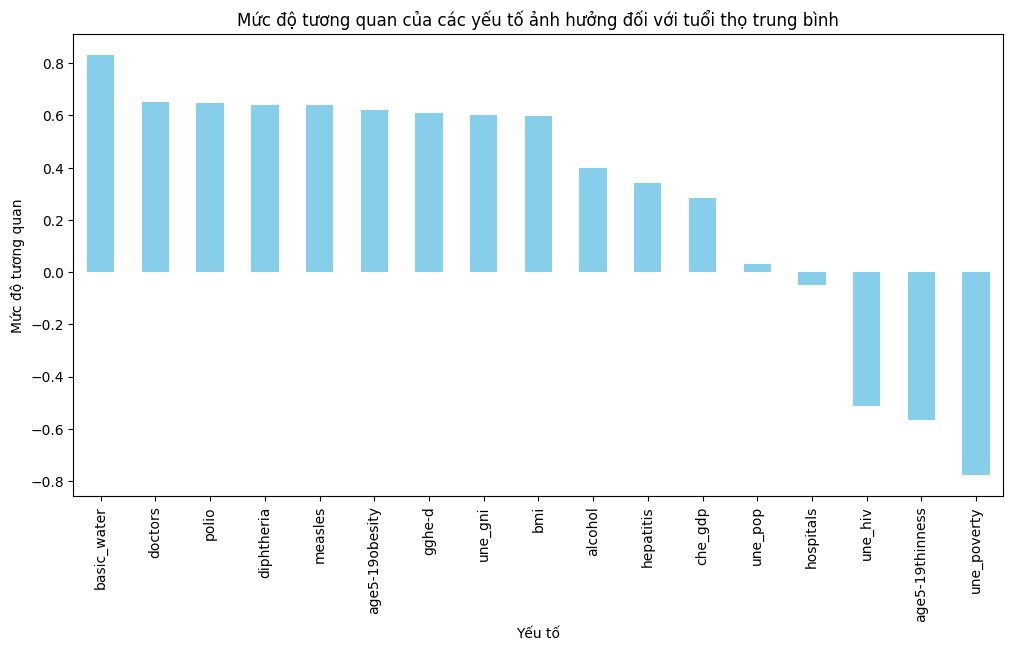

In [4]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
correlation_life_expect.plot(kind='bar', color='skyblue')
plt.title('Mức độ tương quan của các yếu tố ảnh hưởng đối với tuổi thọ trung bình')
plt.xlabel('Yếu tố')
plt.ylabel('Mức độ tương quan')
plt.show()

Kết quả thu được cho thấy:
- Yếu tố "basic_water" (tỷ lệ dân số sử dụng các loại nước uống cơ bản) có ảnh hưởng lớn nhất đến tuổi thọ trung bình. Điều đó càng cho thấy rõ hơn các loại nước uống cơ bản là một phần không thể thiếu trong việc duy trì một sức khỏe tốt.
- Tiếp đến là tỉ lệ bác sĩ, tỉ lệ tiêm các loại vaccine (polio, diphtheria, measles), từ đó cho thấy được tầm quan trọng của công tác y tế nói chung và việc tiêm ngừa đối với các loại dịch bệnh nói riêng, các quốc gia cần tuyên truyền, kêu gọi người dân tiêm đủ các loại vaccine, vì an toàn cho bản thân và tránh trở thành gánh nặng cho gia đình, đất nước.
- Các yếu tố về kinh tế ("gghe-d": chi tiêu chung cho y tế của chính phủ trong nước, "une_gni": GNI bình quân đầu người) cũng có mối tương quan lớn đối với tuổi trọ trung bình. Các quốc gia có nền kinh tế phát triển, đầu tư, chi tiêu nhiều vào y tế thì sức khỏe, tinh thần của người dân sẽ ổn định, và từ đó càng thúc đẩy kinh tế đất nước đi lên.

### Câu 2

### Câu 3

### Câu 4: Trong năm 2016, tỉ lệ dân số sử dụng các loại nước uống cơ bản của 5 quốc gia có tỉ lệ thấp nhất vào năm 2000 thay đổi như thế nào?

Tỉ lệ tăng trưởng của việc sử dụng nước uống trong giao đoạn 2000 - 2016 của các quốc gia được tính theo công thức: (tỉ lệ năm 2016 - tỉ lệ năm 2000) / tỉ lệ năm 2000 * 100%. Tính dataframe water_df gồm 3 cột (tên là "water_2000", "water_2016", "growth_rate") ứng với tỉ lệ năm 2000, tỉ lệ năm 2016 và tỉ lệ tăng trưởng của việc sử dụng các loại nước uống cơ bản trong giai đoạn này; index là tên các quốc gia. Sắp xếp theo thứ tự giảm dần của tỉ lệ tăng trưởng, sau đó dùng head(5) để in ra top 5 các quốc gia có sự thay đổi (tăng trưởng) lớn nhất.

In [5]:
water_df = pd.DataFrame()
water_df['country'] = df['country'].unique()

water_2000 = df[df['year']==2000]['basic_water'].array
water_2016 = df[df['year']==2016]['basic_water'].array
water_df['water_2000'] = water_2000
water_df['water_2016'] = water_2016
water_df.sort_values(by='water_2000', inplace=True)
water_df['growth_rate'] = (water_df['water_2016'] - water_df['water_2000']) / water_df['water_2000'] * 100
water_df.set_index('country', inplace=True)
water_df.head(5)

,water_2000,water_2016,growth_rate
country,,,
Ethiopia,18.69521,40.04142,114.180103
Somalia,19.60301,50.81511,159.220956
Mozambique,19.89657,53.44394,168.608810
Uganda,26.75162,47.66563,78.178480
United Republic of Tanzania,27.25082,54.84754,101.269320


Từ kết quả ở trên, ta tiến hành vẽ biểu đồ cột (2 cột ứng với tỉ lệ năm 2000 và năm 2016) cho thấy được sự thay đổi về tỉ lệ dân số sử dụng các loại nước uống cơ bản của top 5 quốc gia có sự tăng trưởng lớn nhất, trong đó trục hoành là quốc gia, trục tung là tỉ lệ sử dụng.

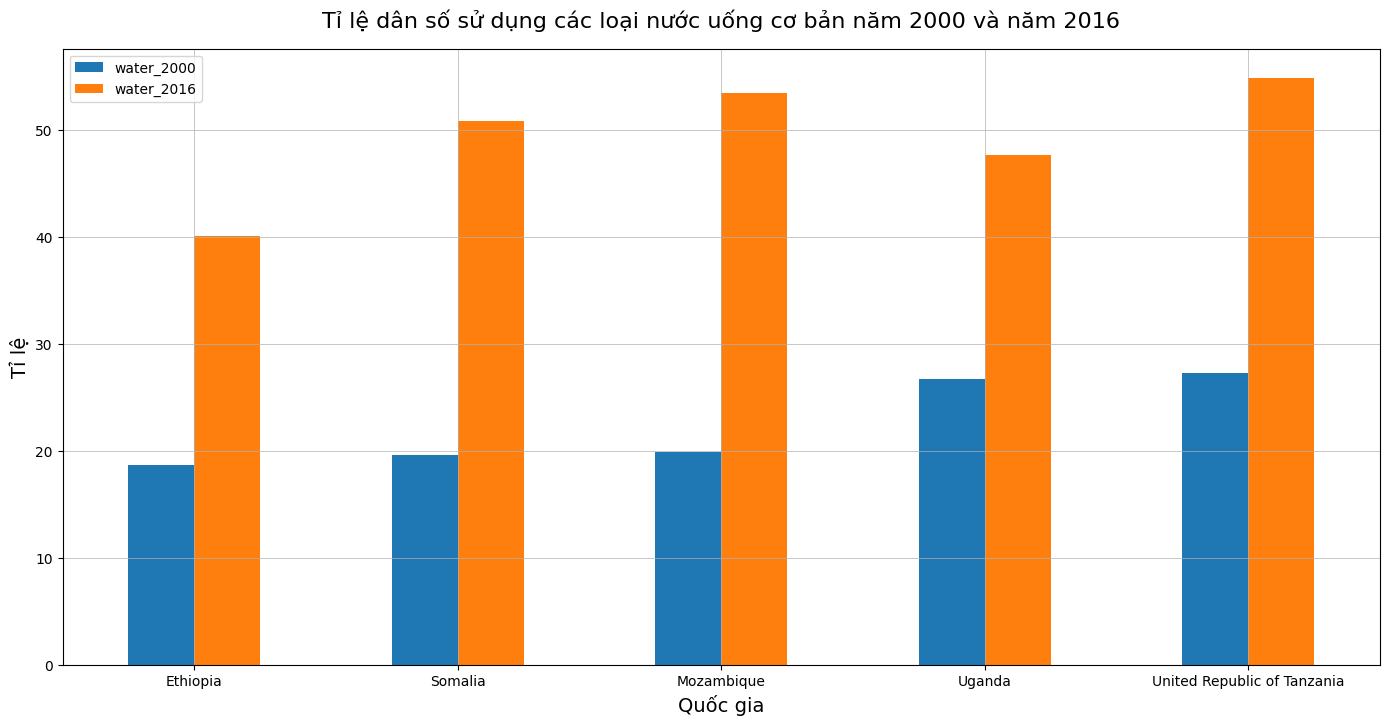

In [6]:
ax = water_df[:5].plot.bar(y=['water_2000', 'water_2016'], rot=0, figsize=(17,8))
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Tỉ lệ dân số sử dụng các loại nước uống cơ bản năm 2000 và năm 2016', pad=15, fontsize=16)
plt.xlabel('Quốc gia', fontsize=14)
plt.ylabel('Tỉ lệ', fontsize=14)
plt.show()

Kết quả thu được là một bảng dữ liệu về tỉ lệ tăng trưởng về sử dụng các loại nước uống cơ bản của dân số các quốc gia trong giai đoạn 2000 - 2016.
Ta thấy, tại các vùng khu vực Châu Phi, tỉ lệ này của các quốc gia có sự tăng trưởng mạnh từ đó cho thấy được các quốc gia ở  khu vực này đã có sự phát triển và tiếp cận thế giới. Đặt biệt là quốc gia "Mozambique" có sự tăng trưởng rõ rệt nhất, qua 17 năm tỉ lệ sử dụng các loại nước uống cơ bản ở quốc gia này tăng gần 169%.